# Import libraries 

Go ahead an import these popular libraries into your notebook by running

```python
import pandas as pd  
import matplotlib.pyplot as plt 
```

If these libraries do not exist on your computer, you would see a `Module Not Found` error. In that case, go ahead and install these libraries by running: 

```
pip install pandas 
pip install matplotlib
```


In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 

# Reading in data

For this exercise, let's assume that a Data Engineer has prepared a dataset for you (as per the previous exercises we did), and the dataset is stored in `../resources/superstore.csv`. 

We can read in the data using: 
```python
df = pd.read_csv("file_path_here")
```

In [2]:
# read in dataset 
df = pd.read_csv("../resources/superstore.csv")
# display first 5 rows 
df.head()

,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Order ID,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Total Sales
0,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-128055,...,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2,0.0,14.8344,3.17,26.490,56.150
1,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-128055,...,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2,0.2,252.5880,54.96,336.784,728.528
2,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-138100,...,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2,0.0,6.2608,1.31,7.280,15.870
3,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-138100,...,Office Supplies,Paper,Staples,14.940,3,0.0,7.0218,0.99,4.980,15.930
4,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2012-121391,...,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2,0.0,7.0096,5.23,13.480,32.190


# Answer Business Questions 

The CFO of GlobalSuperStore has asked us to provide answers on the following questions: 
- What is the total sales for the top 10 countries? 
- What is the average sales for the top 10 product sub-categories? 

To answer those questions, we can use two types of functions in Pandas: 
- **group by functions**: used to group data based on categories. 
    - use: `df.groupby()`
- **aggregation functions**: used to perform calculations on values based on the groupings. 
    - you can use: 
        - `count()`: to count rows for each group 
        - `sum()`: to sum all values for each group 
        - `mean()`: to calculate the average for each group 
        - `min()`: to calculate the minimum for each group 
        - `max()`: to calculate the maximum for each group 

The group by and aggregation functions **must** be used together. 

### Question 1: What is the total sales for the top 10 countries? 

In [20]:
# perform groupby and aggregations
df_sum_by_country_df = df.groupby(["Country"]).sum().reset_index()
total_sales_by_country_df = df_sum_by_country_df[["Country", "Total Sales"]].sort_values(["Total Sales"], ascending=False)
total_sales_by_country_df = total_sales_by_country_df.head(10)
total_sales_by_country_df

,Country,Total Sales
114,United States,2.811782e+06
5,Australia,1.160271e+06
37,France,1.108904e+06
22,China,7.682661e+05
47,India,7.628176e+05
40,Germany,6.226723e+05
69,Mexico,6.157731e+05
113,United Kingdom,5.784021e+05
48,Indonesia,5.449381e+05
100,Spain,3.101477e+05


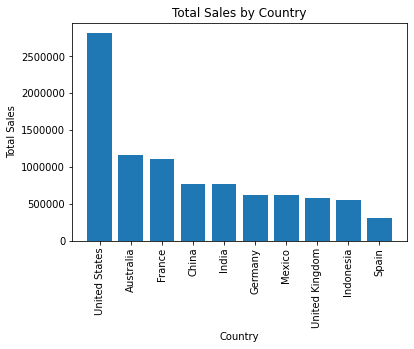

In [21]:
# display results in a bar chart 
plt.bar(
    x=total_sales_by_country_df["Country"], 
    height=total_sales_by_country_df["Total Sales"]
)

# add chart title 
plt.title("Total Sales by Country")

# add x-axis label 
plt.xlabel("Country")

# add y-axis label 
plt.ylabel("Total Sales")

plt.ticklabel_format(style='plain', axis='y') # displays actual numbers instead of scientific notation  

# rotate x-ticks by 90 degrees 
plt.xticks(rotation=90)

# save figure to file 
plt.savefig("total_sales_by_country.png")

# show figure 
plt.show()

### Question 2: What is the average sales for the top 10 product sub-categories? 

In [28]:
# perform groupby and aggregations
df_mean_by_subcategory_df = df.groupby(["Sub-Category"]).mean().reset_index()
avg_sales_by_subcategory_df = df_mean_by_subcategory_df[["Sub-Category", "Total Sales"]].sort_values(["Total Sales"], ascending=False)
avg_sales_by_subcategory_df = avg_sales_by_subcategory_df.rename(columns={"Total Sales": "Avg Sales"})
avg_sales_by_subcategory_df = avg_sales_by_subcategory_df.head(10)
avg_sales_by_subcategory_df

,Sub-Category,Avg Sales
16,Tables,972.013222
6,Copiers,750.756979
4,Bookcases,672.772489
1,Appliances,637.814863
11,Machines,577.520839
13,Phones,563.517101
5,Chairs,485.122776
0,Accessories,270.813203
14,Storage,246.616391
9,Furnishings,134.487500


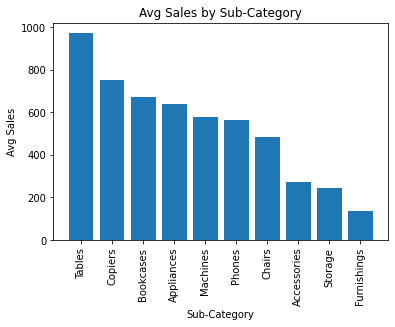

In [30]:
# display results in a bar chart 
plt.bar(
    x=avg_sales_by_subcategory_df["Sub-Category"], 
    height=avg_sales_by_subcategory_df["Avg Sales"]
)

# add chart title 
plt.title("Avg Sales by Sub-Category")

# add x-axis label 
plt.xlabel("Sub-Category")

# add y-axis label 
plt.ylabel("Avg Sales")

# rotate x-ticks by 90 degrees 
plt.xticks(rotation=90)

# save figure to file 
plt.savefig("avg_sales_by_sub_category.png")

# show figure 
plt.show()